In [1]:
import sys
sys.path.append("/mnt/d/00_SARDARCHITECTLABS/projects/fscoreai-ml/")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Get Data

In [2]:
from fscoreai.utils import utils

In [3]:
X,y = utils.get_data(name='kc_house_data')
X, y  = X[:1000], y[:1000]
print(X.shape, y.shape)

(1000, 1) (1000,)


## Using sklearn for testing

In [4]:
from sklearn.linear_model import Ridge

In [5]:
model_sklearn = Ridge(fit_intercept=True, alpha=1.0)
model_sklearn.fit(X,y)
print(model_sklearn.coef_, model_sklearn.intercept_)

[269.46205434] -32304.654019277717


## Fscore AI Library Model

In [18]:
class SimpleLinearRegression():
    def __init__(self):
        self.coef_ = 0
        self.intercept_ = 0

    def fit(self, X, y, fit_type = 'stat', lr=1e-8, epochs=50):    
        if (fit_type == 'stat'):
            X_mean = np.mean(X, axis=0)
            y_mean = np.mean(y)
            self.coef_ = np.sum((X - X_mean).T*(y-y_mean), axis=1)/(np.sum((X - X_mean)**2, axis=0)) 
            self.intercept_ = y_mean - (self.coef_ * X_mean)
            return self
        
        if (fit_type == 'grad'):
            self.alpha = alpha  #   Learning rate
            self.epochs = epochs
            self.n, self.d = X.shape

            for epoch in range(self.epochs):
                y_pred = self.predict(X)
                d_coef = - (1 / self.n) * np.sum((y - y_pred).dot(X)) #Derivative w.r.t. self.coef_
                d_intercept = - (1 / self.n) * np.sum(y - y_pred) #Derivative w.r.t. self.intercept_
                self.coef_ -=  self.alpha * d_coef          #    Update self.coef_ 
                self.intercept_ -=  self.alpha * d_intercept  #    Update self.intercept_
            return self

    def predict(self, X):
        return np.dot(X, self.coef_) + self.intercept_

In [ ]:
class RidgeRegression():
    def __init__(self):
        self.coef_ = 0
        self.intercept_ = 0

    def fit(self, X, y, fit_type = 'stat', lr=1e-8, epochs=50, alpha=1.0):    

        if (fit_type == 'stat'):
            A = np.identity(d)
            A[0,0] = 0
            A_biased = self.alpha = 
            X_mean = np.mean(X, axis=0)
            y_mean = np.mean(y)
            self.coef_ = np.sum((X - X_mean).T*(y-y_mean), axis=1)/(np.sum((X - X_mean)**2, axis=0)) 
            self.intercept_ = y_mean - (self.coef_ * X_mean)
        
        if (fit_type == 'grad'):
            self.alpha = alpha  #   Learning rate
            self.epochs = epochs
            self.penalty = penalty
            self.n, self.d = X.shape

            for epoch in range(self.epochs):
                y_pred = self.predict(X)
                d_coef = - (1 / self.n) * np.sum((y - y_pred).dot(X)) #Derivative w.r.t. self.coef_
                d_intercept = - (1 / self.n) * np.sum(y - y_pred) #Derivative w.r.t. self.intercept_
                self.coef_ -=  self.alpha * d_coef          #    Update self.coef_ 
                self.intercept_ -=  self.alpha * d_intercept  #    Update self.intercept_
            return self

    def predict(self, X):
        return np.dot(X, self.coef_) + self.intercept_

In [7]:
model_fscore_1 = linear_regression.SimpleLinearRegression()
model_fscore_1.fit(X,y, fit_type='stat')
print(model_fscore_1.coef_, model_fscore_1.intercept_)

[269.46205468] [-32304.65472103]


In [8]:
model_fscore_2 = linear_regression.SimpleLinearRegression()
model_fscore_2.fit(X,y, fit_type='grad', alpha=1e-11, epochs=10000)
print(model_fscore_2.coef_, model_fscore_2.intercept_)

304.15144604552836 10.19867691045192


## Plotting the models

In [9]:
preds_sklearn = model_sklearn.predict(X)
preds_fscore_1 = model_fscore_1.predict(X)
preds_fscore_2 = model_fscore_2.predict(X)

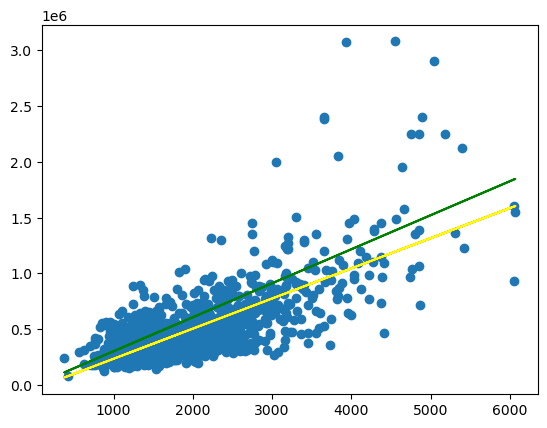

In [12]:
plt.scatter(X, y)
plt.plot(X, preds_sklearn, color='red')
plt.plot(X, preds_fscore_1, color='yellow')
plt.plot(X, preds_fscore_2, color='green')